### Importación Librerías

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
%matplotlib inline

### Importación Datos

In [193]:
datosEntrenamiento = pd.read_csv('ProyectoDatos.txt', sep=';', encoding = 'utf-8')
datosEntrenamiento.head(10)

,Comentario,Emocion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


## Fase 1 - Perfilamiento de los Datos

In [194]:
datosEntrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Comentario  16000 non-null  object
 1   Emocion     16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB



* Los datos tienen 16,000 registros y 2 columnas
* Las 2 columnas son de tipo object


In [195]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
datosEntrenamiento.describe(include=[object])

,Comentario,Emocion
count,16000,16000
unique,15969,6
top,i could feel myself hit this strange foggy wall,joy
freq,2,5362


In [196]:
datosEntrenamiento['Emocion'].replace(to_replace = ['joy'], value = '1', inplace = True)
datosEntrenamiento['Emocion'].replace(to_replace = ['sadness'], value = '2', inplace = True)
datosEntrenamiento['Emocion'].replace(to_replace = ['anger'], value = '3', inplace = True)
datosEntrenamiento['Emocion'].replace(to_replace = ['fear'], value = '4', inplace = True)
datosEntrenamiento['Emocion'].replace(to_replace = ['love'], value = '5', inplace = True)
datosEntrenamiento['Emocion'].replace(to_replace = ['surprise'], value = '6', inplace = True)

In [197]:
datosEntrenamiento['Emocion'] = pd.to_numeric(datosEntrenamiento.Emocion, errors = 'coerce')

In [198]:
datosEntrenamiento.describe(include=[np.number])

,Emocion
count,16000.000000
mean,2.429438
std,1.440668
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,6.000000


* La columna Emocion es nuestra variable a predecir, esto va de 1 a 6. 

In [199]:
datosEntrenamiento['Comentario'].nunique()

15969

In [200]:
datosEntrenamiento.isnull().sum()

Comentario    0
Emocion       0
dtype: int64

* Los datos no tienen valores nulos

In [201]:
datosEntrenamiento[datosEntrenamiento.duplicated(['Comentario'])]

,Comentario,Emocion
5067,i feel on the verge of tears from weariness i ...,1
6133,i still feel a craving for sweet food,5
6563,i tend to stop breathing when i m feeling stre...,3
7623,i was intensely conscious of how much cash i h...,2
7685,im still not sure why reilly feels the need to...,6
8246,i am not amazing or great at photography but i...,5
9596,ive also made it with both sugar measurements ...,1
9687,i had to choose the sleek and smoother feel of...,1
9769,i often find myself feeling assaulted by a mul...,2
9786,i feel im being generous with that statement,1


In [202]:
datosEntrenamiento[datosEntrenamiento.duplicated(['Comentario','Emocion'])]

,Comentario,Emocion
13846,i feel more adventurous willing to take risks ...,1


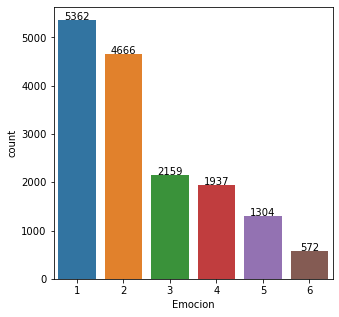

In [203]:
fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Emocion', data=datosEntrenamiento)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

import nltk

nltk.download()

## Fase 2 - Preparación de los datos

In [204]:
datosEntrenamiento.drop_duplicates(subset ="Comentario", keep = 'first', inplace = True) 
datosEntrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15969 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Comentario  15969 non-null  object
 1   Emocion     15969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 374.3+ KB


In [205]:
datosEntrenamiento[datosEntrenamiento.duplicated(['Comentario'])]

,Comentario,Emocion


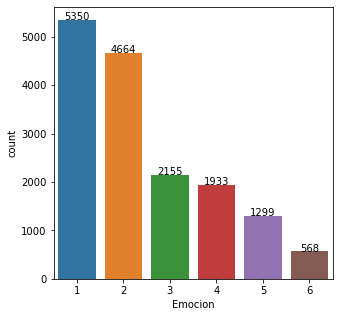

In [206]:
fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Emocion', data=datosEntrenamiento)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [207]:
stop = stopwords.words('english')

In [208]:
stop[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [209]:
len(stop)

179

In [210]:
stop.append('@')
stop.append('RT')


In [211]:
stop.append(':')

In [212]:
stop.append('rt')

In [213]:
def clean_And_Token(text):
    text = "".join([c for c in text  if c not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [word for word in tokens if word not in stop]
    return text

Metodo les quita los signos de puntuacion, les quita los stop words, y lo tokeniza dejandolos en lower case

In [214]:
datosEntrenamiento['unigramas_limpio'] = datosEntrenamiento['Comentario'].apply(lambda x: clean_And_Token(x.lower()))
datosEntrenamiento.head(10)

,Comentario,Emocion,unigramas_limpio
0,i didnt feel humiliated,2,"[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,2,"[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,3,"[im, grabbing, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,5,"[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,3,"[feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,2,"[ive, feeling, little, burdened, lately, wasnt..."
6,ive been taking or milligrams or times recomme...,6,"[ive, taking, milligrams, times, recommended, ..."
7,i feel as confused about life as a teenager or...,4,"[feel, confused, life, teenager, jaded, year, ..."
8,i have been with petronas for years i feel tha...,1,"[petronas, years, feel, petronas, performed, w..."
9,i feel romantic too,5,"[feel, romantic]"


In [215]:
ps = PorterStemmer()

In [216]:
def stemming(texto_token):
    texto = [ps.stem(word) for word in texto_token]
    return texto

    

In [217]:
datosEntrenamiento['unigrama_stemmed'] = datosEntrenamiento['unigramas_limpio'].apply(lambda x: stemming(x))
datosEntrenamiento.head(10)

,Comentario,Emocion,unigramas_limpio,unigrama_stemmed
0,i didnt feel humiliated,2,"[didnt, feel, humiliated]","[didnt, feel, humili]"
1,i can go from feeling so hopeless to so damned...,2,"[go, feeling, hopeless, damned, hopeful, aroun...","[go, feel, hopeless, damn, hope, around, someo..."
2,im grabbing a minute to post i feel greedy wrong,3,"[im, grabbing, minute, post, feel, greedy, wrong]","[im, grab, minut, post, feel, greedi, wrong]"
3,i am ever feeling nostalgic about the fireplac...,5,"[ever, feeling, nostalgic, fireplace, know, st...","[ever, feel, nostalg, fireplac, know, still, p..."
4,i am feeling grouchy,3,"[feeling, grouchy]","[feel, grouchi]"
5,ive been feeling a little burdened lately wasn...,2,"[ive, feeling, little, burdened, lately, wasnt...","[ive, feel, littl, burden, late, wasnt, sure]"
6,ive been taking or milligrams or times recomme...,6,"[ive, taking, milligrams, times, recommended, ...","[ive, take, milligram, time, recommend, amount..."
7,i feel as confused about life as a teenager or...,4,"[feel, confused, life, teenager, jaded, year, ...","[feel, confus, life, teenag, jade, year, old, ..."
8,i have been with petronas for years i feel tha...,1,"[petronas, years, feel, petronas, performed, w...","[petrona, year, feel, petrona, perform, well, ..."
9,i feel romantic too,5,"[feel, romantic]","[feel, romant]"


In [218]:
def allWords(texto_token):
    allwords = []
    for word in texto_token:
        allwords.append(word)
    return allwords

In [219]:
allwords = []
allwords = datosEntrenamiento['unigrama_stemmed'].apply(lambda x: allWords(x))

In [220]:
allwords

0                                    [didnt, feel, humili]
1        [go, feel, hopeless, damn, hope, around, someo...
2             [im, grab, minut, post, feel, greedi, wrong]
3        [ever, feel, nostalg, fireplac, know, still, p...
4                                          [feel, grouchi]
                               ...                        
15995    [brief, time, beanbag, said, anna, feel, like,...
15996    [turn, feel, pathet, still, wait, tabl, sub, t...
15997                         [feel, strong, good, overal]
15998                [feel, like, rude, comment, im, glad]
15999                   [know, lot, feel, stupid, portray]
Name: unigrama_stemmed, Length: 15969, dtype: object

In [221]:
todas = []
for i in allwords:
    for j in i:
        todas.append(j)
        

In [222]:
len(todas)

149389

In [223]:
allwords = nltk.FreqDist(todas)

In [224]:
len(allwords)

10376

In [225]:
sorted_fdist1 = sorted(allwords , key = allwords.__getitem__, reverse = True)
word_features = sorted_fdist1[0:3000]

In [226]:
word_features[0]

'feel'

In [227]:
len(word_features)

3000

In [228]:
def find_features(tweet):
    words = set(tweet)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features
    

In [229]:
data = datosEntrenamiento

In [230]:
data.head(5)

,Comentario,Emocion,unigramas_limpio,unigrama_stemmed
0,i didnt feel humiliated,2,"[didnt, feel, humiliated]","[didnt, feel, humili]"
1,i can go from feeling so hopeless to so damned...,2,"[go, feeling, hopeless, damned, hopeful, aroun...","[go, feel, hopeless, damn, hope, around, someo..."
2,im grabbing a minute to post i feel greedy wrong,3,"[im, grabbing, minute, post, feel, greedy, wrong]","[im, grab, minut, post, feel, greedi, wrong]"
3,i am ever feeling nostalgic about the fireplac...,5,"[ever, feeling, nostalgic, fireplace, know, st...","[ever, feel, nostalg, fireplac, know, still, p..."
4,i am feeling grouchy,3,"[feeling, grouchy]","[feel, grouchi]"


In [231]:
del data['Comentario']
del data['unigramas_limpio']
data.head(5)

,Emocion,unigrama_stemmed
0,2,"[didnt, feel, humili]"
1,2,"[go, feel, hopeless, damn, hope, around, someo..."
2,3,"[im, grab, minut, post, feel, greedi, wrong]"
3,5,"[ever, feel, nostalg, fireplac, know, still, p..."
4,3,"[feel, grouchi]"


In [232]:
f = data.to_records(index=False)
f[0]

(2, list(['didnt', 'feel', 'humili']))

In [233]:
devTestF = f[5000:6000]

In [234]:
testF =f[6676:]

In [235]:
featureSet = [(find_features(rev), emocion) for (emocion,rev) in f]

In [236]:
featureSet[0]

({'feel': True,
  'like': False,
  'im': False,
  'get': False,
  'time': False,
  'realli': False,
  'know': False,
  'make': False,
  'go': False,
  'want': False,
  'love': False,
  'littl': False,
  'think': False,
  'day': False,
  'thing': False,
  'peopl': False,
  'one': False,
  'would': False,
  'even': False,
  'still': False,
  'ive': False,
  'life': False,
  'way': False,
  'need': False,
  'bit': False,
  'someth': False,
  'much': False,
  'dont': False,
  'work': False,
  'could': False,
  'say': False,
  'start': False,
  'look': False,
  'see': False,
  'back': False,
  'tri': False,
  'good': False,
  'pretti': False,
  'right': False,
  'alway': False,
  'come': False,
  'help': False,
  'friend': False,
  'also': False,
  'year': False,
  'today': False,
  'use': False,
  'take': False,
  'around': False,
  'person': False,
  'cant': False,
  'made': False,
  'hate': False,
  'well': False,
  'happi': False,
  'though': False,
  'didnt': True,
  'got': False,
  'w

In [237]:
len(featureSet)

15969

In [238]:
datosEntrenamiento = featureSet[:6676]
datosTesteo = featureSet[6676:]

## Testeo de Datos

In [239]:
clasificador = nltk.NaiveBayesClassifier.train(datosEntrenamiento)

### Metricas de Calidad del Modelo

In [240]:
print("Naive Bayes accuracy: ", (nltk.classify.accuracy(clasificador,datosTesteo))*100)

Naive Bayes accuracy:  75.69138060906059


In [241]:
errors = []
t=[]
for (target, tweet) in testF:
    guess = clasificador.classify(find_features(tweet))
    if guess != target:   
        errors.append((target,guess,tweet))
    else:
        t.append((target,guess,tweet))

In [242]:
errors[:10]

[(4,
  2,
  ['sometim',
   'confus',
   'well',
   'moment',
   'time',
   'need',
   'day',
   'pay',
   'bill',
   'come',
   'dont',
   'money',
   'need',
   'sometim',
   'feel',
   'confus',
   'well']),
 (1,
  4,
  ['ill',
   'transfer',
   'feel',
   'use',
   'next',
   'year',
   'class',
   'class',
   'websit',
   'specif',
   'content',
   'unit',
   'blog',
   'site']),
 (1, 2, ['feel', 'heart', 'lot', 'make', 'sure', 'still']),
 (1,
  2,
  ['im',
   'feel',
   'gener',
   'yesterday',
   'year',
   'tpt',
   'aversari',
   'slack',
   'blog',
   'sinc',
   'last',
   'week',
   'ive',
   'sick']),
 (1,
  2,
  ['didnt',
   'feel',
   'support',
   'whole',
   'confer',
   'pull',
   'gunk',
   'drain',
   'one',
   'sink',
   'wonder',
   'whether',
   'folk',
   'came',
   'make',
   'confer',
   'work',
   'might',
   'feel',
   'frustrat',
   'didnt',
   'work',
   'noth',
   'would',
   'done']),
 (5, 1, ['im', 'feel', 'gener', 'tonight']),
 (3,
  2,
  ['think', 'feel

Estos son los errores que arroja, seria interesante analizar en donde y por que se esta equivocando. Por que me esta arrojando falsos positivos y falsos negativos?

In [243]:
len(errors)

2259

##### Calcula Falsos Positivos, Falsos Negativos, TruePositives, FalsePositives.    (0 - Positivo, 1 - Negativo)

In [244]:
countFP = 0
countFN = 0
countTP = 0
countTN = 0
for (target,guess,mgs) in errors:
    if target == 0 and guess == 1:
        countFP = countFP + 1
    elif target == 1 and guess == 0:
        countFN = countFN + 1
for (target,guess,mgs) in t:
    if target == 1 and guess == 1:
        countTN = countTN + 1
    else:
        countTP = countTP + 1
print(f"Numero de falsos positivos es {countFP}")
print(f"Numero de falsos negativos es {countFN}")
print(f"Numero de falsos positivos es {countTP}")
print(f"Numero de falsos negativos es {countTN}")

Numero de falsos positivos es 0
Numero de falsos negativos es 0
Numero de falsos positivos es 4355
Numero de falsos negativos es 2679


In [245]:
recall = (countTP/(countTP + countFN))*100
precision = (countTP/(countTP + countFP))*100
f1Score = 2*((precision*recall)/(precision+recall))
print(f"El recall es {recall}")
print(f"La precision es {precision}")
print(f"F1Score es {f1Score}")

El recall es 100.0
La precision es 100.0
F1Score es 100.0


In [246]:
clasificador.show_most_informative_features(15)

Most Informative Features
                    amaz = True                6 : 2      =    145.5 : 1.0
                 impress = True                6 : 1      =    123.5 : 1.0
                   irrit = True                3 : 2      =     69.6 : 1.0
                   funni = True                6 : 1      =     64.7 : 1.0
                  tender = True                5 : 1      =     62.2 : 1.0
                   sweet = True                5 : 2      =     60.5 : 1.0
                   belov = True                5 : 2      =     58.1 : 1.0
                 surpris = True                6 : 2      =     57.5 : 1.0
                   loyal = True                5 : 1      =     53.9 : 1.0
                  strang = True                6 : 2      =     53.5 : 1.0
                   shock = True                6 : 2      =     52.3 : 1.0
                  reluct = True                4 : 2      =     47.3 : 1.0
                  offend = True                3 : 1      =     46.7 : 1.0

In [247]:
def prepararString(tweet):
    tweet = tweet.lower()
    tweet = "".join([c for c in tweet  if c not in string.punctuation])
    tokens = re.split('\W+',tweet)
    tweetC = [word for word in tokens if word not in stop]
    tweetS = [ps.stem(word) for word in tweetC]
    return tweetS
        

In [248]:
clasificador.classify(find_features(prepararString("I feel this was great")))

1

In [249]:
print(prepararString("I feel this was great"))

['feel', 'great']


In [250]:

clasificador.classify(find_features(prepararString("I hate it so much")))

2

In [251]:
print(prepararString("I hate it so much"))

['hate', 'much']


In [252]:
clasificador.classify(find_features(prepararString("I could'nt beleive it")))

3

In [253]:
print(prepararString("I could'nt beleive it"))

['couldnt', 'beleiv']


In [254]:
clasificador.classify(find_features(prepararString("I feel very good about this")))

1

In [255]:
print(prepararString("I feel very good about this"))

['feel', 'good']


In [256]:
clasificador.classify(find_features(prepararString("I am confused how this works")))

4

In [257]:
print(prepararString("I am confused with this"))

['confus']
